In [2]:
# tahap ini untuk mengimport library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# load dataset
df = pd.read_csv("../data/dataset_satelit.csv")
df

,No,Longitude,Lattitude,N,P,K,Ca,Mg,Fe,Mn,...,b1,Sigma_VV,Sigma_VH,plia,lia,iafe,gamma0_vv,gamma0_vh,beta0_vv,beta0_vh
0,1,103.036658,-0.604417,2.64,0.15,0.415,0.51,0.31,119.96,463.23,...,0.0433,0.18183,0.04461,35.74446,35.79744,35.41161,0.22331,0.05479,0.31325,0.07686
1,2,103.037201,-0.604689,2.75,0.17,0.568,0.76,0.58,102.63,493.81,...,0.0465,0.22079,0.04640,35.12096,35.14591,35.41510,0.27116,0.05699,0.38033,0.07993
2,3,103.036359,-0.603012,1.77,0.12,0.339,0.49,0.6,107.37,460.93,...,0.0417,0.18926,0.03992,35.07724,35.07730,35.41135,0.23242,0.04902,0.32604,0.06876
3,4,103.036950,-0.603219,2.30,0.15,0.460,0.74,0.67,96.02,338.17,...,0.0367,0.14769,0.03622,36.08078,36.08469,35.41583,0.18138,0.04448,0.25440,0.06238
4,5,103.036802,-0.601969,2.05,0.14,0.308,0.64,0.72,87.01,384.33,...,0.0361,0.18205,0.03797,32.68855,32.69293,35.41592,0.22359,0.04664,0.31359,0.06541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,590,103.605867,0.057633,2.49,0.16,0.347,0.78,0.86,63.38,269.95,...,0.2336,0.13050,0.09390,0.12700,0.09860,0.02600,0.00870,0.01690,0.00930,0.01630
590,591,103.606717,0.057100,2.74,0.15,0.466,0.73,0.5,51.04,683.42,...,0.2506,0.21280,0.15920,0.20060,0.14730,0.03870,0.01380,0.02290,0.01270,0.01640
591,592,103.606250,0.056767,2.63,0.15,0.422,0.82,0.59,82.57,396.18,...,0.3413,0.27730,0.17820,0.25790,0.18690,0.04620,0.01250,0.02250,0.01600,0.01930
592,593,103.606400,0.056517,2.75,0.17,0.502,0.69,0.53,102.07,246.35,...,0.3413,0.32740,0.28760,0.29970,0.22250,0.05290,0.01800,0.03350,0.01790,0.01930


# Eksplorasi Data

In [3]:
# tahap ini untuk mengecek informasi dataset
df.info()

# tahap ini untuk mengecek statistik deskriptif dataset
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 34 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   No         594 non-null    int64  
 1   Longitude  594 non-null    float64
 2   Lattitude  594 non-null    float64
 3   N          594 non-null    float64
 4   P          594 non-null    float64
 5   K          593 non-null    float64
 6   Ca         594 non-null    float64
 7   Mg         594 non-null    object 
 8   Fe         594 non-null    float64
 9   Mn         594 non-null    float64
 10  Cu         594 non-null    float64
 11  Zn         594 non-null    float64
 12  B          594 non-null    float64
 13  b12        594 non-null    float64
 14  b11        594 non-null    float64
 15  b9         594 non-null    float64
 16  b8a        594 non-null    float64
 17  b8         594 non-null    float64
 18  b7         594 non-null    float64
 19  b6         594 non-null    float64
 20  b5        

,No,Longitude,Lattitude,N,P,K,Ca,Fe,Mn,Cu,...,b1,Sigma_VV,Sigma_VH,plia,lia,iafe,gamma0_vv,gamma0_vh,beta0_vv,beta0_vh
count,594.000000,594.000000,594.000000,594.000000,594.000000,593.000000,594.000000,594.000000,594.000000,594.000000,...,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000
mean,297.500000,106.878644,-1.024933,2.259091,0.141380,0.582175,0.595094,74.613771,308.034697,2.391195,...,0.177291,0.234474,0.102789,28.640422,28.664891,28.609569,0.202587,0.051524,0.269642,0.062320
std,171.617307,4.949840,0.965349,0.395499,0.019782,0.222567,0.366118,55.579655,241.731643,1.580296,...,0.155615,0.070516,0.112310,15.325347,15.380384,15.329170,0.104357,0.012959,0.143728,0.024218
min,1.000000,102.760857,-2.333750,1.140000,0.090000,0.122000,0.050000,21.080000,3.160000,0.090000,...,0.014100,0.115170,0.021460,0.127000,0.098600,0.026000,0.008700,0.016900,0.009300,0.016300
25%,149.250000,102.927811,-2.233338,1.982500,0.130000,0.429000,0.320000,40.705000,124.015000,1.172500,...,0.046925,0.183210,0.039535,31.959745,31.968948,33.685353,0.183085,0.040250,0.244935,0.052772
50%,297.500000,103.581969,-0.602276,2.280000,0.140000,0.549000,0.540000,65.650000,239.445000,2.225000,...,0.072700,0.213385,0.046550,35.067930,35.110415,34.611565,0.233590,0.050415,0.310380,0.068380
75%,445.750000,113.403797,-0.257349,2.570000,0.150000,0.710000,0.790000,87.372500,434.990000,3.357500,...,0.318900,0.262242,0.059190,38.319135,38.441065,39.002760,0.271790,0.060410,0.364505,0.079020
max,594.000000,113.434700,0.069251,3.230000,0.220000,1.489000,2.820000,559.100000,2009.320000,8.170000,...,0.751400,0.512210,0.373000,47.592900,48.014640,39.209330,0.658960,0.122300,0.814170,0.150620


# Menyeleksi Variabel X dan Y

In [ ]:
X = df[['N']] # sebagai variabel independen
y = df[['b1']] # sebagai variabel dependen

# Split Data menjadi Data Train dan Testing

In [ ]:
# Split Data menjadi Data Train dan Testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Membuat dan Melatih Model Linear Regression

In [23]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


# Prediksi dan Evaluasi Model

In [24]:
y_pred = model.predict(X_test)
print("koefisien:", model.coef_)
print("intercept:", model.intercept_)
print("r'2 score:", model.score(X_test, y_test))

koefisien: [[0.12138298]]
intercept: [-0.09860034]
r'2 score: 0.0876584775341992


# Tambahkan Konstanta (intercept)


In [ ]:
X = sm.add_constant(X)

# Fit Model OLS

In [ ]:
model = sm.OLS(y, X).fit()

# ringkasan hasil regresi
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     b1   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     63.89
Date:                Mon, 03 Nov 2025   Prob (F-statistic):           6.92e-15
Time:                        09:44:58   Log-Likelihood:                 293.15
No. Observations:                 594   AIC:                            -582.3
Df Residuals:                     592   BIC:                            -573.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1001      0.035     -2.842      0.0

# Ambil Koefisien

In [34]:
intercept = model.params['const']
n_coef = model.params['N']
print("Intercept:", intercept)
print("Koefisien N:", n_coef)

Intercept: -0.10013181208023626
Koefisien N: 0.12280273967930565


# Visualisasi Hasil Linear Regression

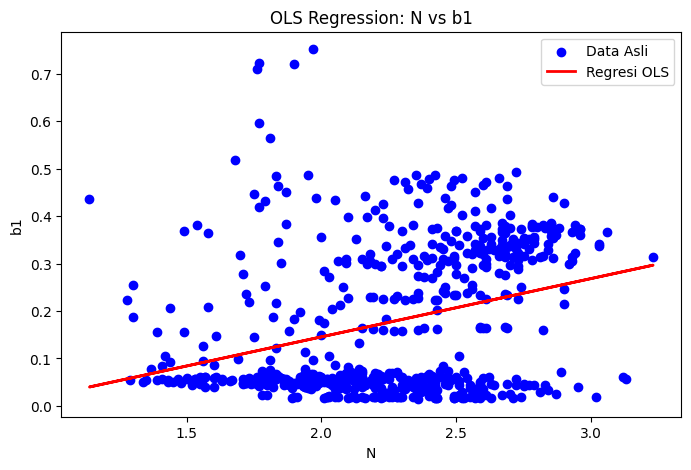

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(df['N'], y, color='blue', label='Data Asli')
plt.plot(df['N'], model.predict(X), color='red', linewidth=2, label='Regresi OLS')
plt.xlabel('N')
plt.ylabel('b1')
plt.title('OLS Regression: N vs b1')
plt.legend()
plt.show()

